## 01. Import Visualzation Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import os


In [2]:
matplotlib.__version__

'3.9.2'

In [3]:
path= r'C:\Users\Bilel\Desktop\data_analyst_Carrer Foundry\Data Immersion\A6-Advanced Analytics & Dashboard Design\20-01-24 NY Citi Bike project'

In [4]:
# import citi_clean datset
df=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','citi_clean.csv'),index_col = False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               49977 non-null  int64  
 1   trip_id                  49977 non-null  object 
 2   bike_id                  49977 non-null  int64  
 3   day_of_week              49977 non-null  object 
 4   start_hour               49977 non-null  int64  
 5   start_time               49977 non-null  object 
 6   start_station_id         49977 non-null  int64  
 7   start_station_name       49977 non-null  object 
 8   start_station_latitude   49977 non-null  float64
 9   start_station_longitude  49977 non-null  float64
 10  end_time                 49977 non-null  object 
 11  end_station_id           49977 non-null  int64  
 12  end_station_name         49977 non-null  object 
 13  end_station_latitude     49977 non-null  float64
 14  end_station_longitude 

## 02. Data Cleaning

In [6]:
# Drop the 'unwanted_column' from the DataFrame
df_clean = df.drop('Unnamed: 0', axis=1)

In [7]:
df_clean.head()

trip_id  bike_id day_of_week  start_hour           start_time  \
0  LnQzQk    16013         Mon          18  2013-09-09 18:18:55   
1  IL9boN    15230         Thu          18  2013-09-12 18:38:53   
2  46clGB    17942         Wed          19  2013-09-18 19:44:04   
3  v7vdFt    19683         Sat          11  2013-09-28 11:54:37   
4  VGBsb5    18024         Sat          18  2013-09-07 18:08:22   

   start_station_id       start_station_name  start_station_latitude  \
0               523          W 38 St & 8 Ave               40.754666   
1               257  Lispenard St & Broadway               40.719392   
2               479          9 Ave & W 45 St               40.760193   
3               527          E 33 St & 1 Ave               40.743156   
4               521          8 Ave & W 31 St               40.750450   

   start_station_longitude             end_time  end_station_id  \
0               -73.991382  2013-09-09 18:35:28             334   
1               -74.002472  2013-09-12 18:48:34             236   
2               -73.991255  2013-09-18 19:50:05             513   
3               -73.974347  2013-09-28 12:03:58             441   
4               -73.994811  2013-09-07 18:46:38             476   

      end_station_name  end_station_latitude  end_station_longitude  \
0      W 20 St & 7 Ave             40.742388             -73.997262   
1  St Marks Pl & 2 Ave             40.728419             -73.987140   
2     W 56 St & 10 Ave             40.768254             -73.988639   
3      E 52 St & 2 Ave             40.756014             -73.967416   
4      E 31 St & 3 Ave             40.743943             -73.979661   

   trip_duration      subscriber  birth_year  gender  trip_duration_minutes  \
0            993      Subscriber        1968       2                     16   
1            581      Subscriber        1983       1                      9   
2            361      Subscriber        1989       1                      6   
3            561      Subscriber        1988       2                      9   
4           2296  Non-Subscriber        1978       0                     38   

   age  
0   45  
1   30  
2   24  
3   25  
4   35

In [8]:
print(df_clean.columns)


Index(['trip_id', 'bike_id', 'day_of_week', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender',
       'trip_duration_minutes', 'age'],
      dtype='object')


In [9]:
#Missing Values Chek:
df_clean.isnull().sum()

trip_id                    0
bike_id                    0
day_of_week                0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
trip_duration_minutes      0
age                        0
dtype: int64

In [10]:
# Find duplicates
df_dups=df_clean[df_clean.duplicated()]
df_dups.shape

(0, 20)

In [11]:
#Misxed_type Data chek:
for col in df_clean.columns.tolist():
      weird = (df_clean[[col]].applymap(type) != df_clean[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_clean[weird]) > 0:
        print (col)

C:\Users\Bilel\AppData\Local\Temp\ipykernel_19324\2871549346.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_clean[[col]].applymap(type) != df_clean[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Bilel\AppData\Local\Temp\ipykernel_19324\2871549346.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_clean[[col]].applymap(type) != df_clean[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Bilel\AppData\Local\Temp\ipykernel_19324\2871549346.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_clean[[col]].applymap(type) != df_clean[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Bilel\AppData\Local\Temp\ipykernel_19324\2871549346.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_clean[[col]].applymap(type) != df_clean[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\Bilel\AppDa

## 03. Exploring Relationships

### 3.1 Subset of relevant variables for analysis

In [12]:
df_clean.dtypes

trip_id                     object
bike_id                      int64
day_of_week                 object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                   int64
gender                       int64
trip_duration_minutes        int64
age                          int64
dtype: object

In [13]:
df_selected= df_clean[['start_hour', 'start_station_latitude','start_station_longitude', 'end_station_latitude','end_station_longitude', 'trip_duration','birth_year','gender']]

In [14]:
df_selected.head()

start_hour  start_station_latitude  start_station_longitude  \
0          18               40.754666               -73.991382   
1          18               40.719392               -74.002472   
2          19               40.760193               -73.991255   
3          11               40.743156               -73.974347   
4          18               40.750450               -73.994811   

   end_station_latitude  end_station_longitude  trip_duration  birth_year  \
0             40.742388             -73.997262            993        1968   
1             40.728419             -73.987140            581        1983   
2             40.768254             -73.988639            361        1989   
3             40.756014             -73.967416            561        1988   
4             40.743943             -73.979661           2296        1978   

   gender  
0       2  
1       1  
2       1  
3       2  
4       0

### 3.2 Correlation

In [15]:
# Create a correlation matrix using pandas
df_selected.corr()

start_hour  start_station_latitude  \
start_hour                 1.000000               -0.009111   
start_station_latitude    -0.009111                1.000000   
start_station_longitude   -0.045836                0.211774   
end_station_latitude      -0.036988                0.585719   
end_station_longitude      0.007049                0.078052   
trip_duration              0.040906               -0.025183   
birth_year                 0.062348               -0.045349   
gender                    -0.013798               -0.012492   

                         start_station_longitude  end_station_latitude  \
start_hour                             -0.045836             -0.036988   
start_station_latitude                  0.211774              0.585719   
start_station_longitude                 1.000000              0.092962   
end_station_latitude                    0.092962              1.000000   
end_station_longitude                   0.418246              0.200062   
trip_duration                          -0.007112             -0.043882   
birth_year                              0.023475             -0.041353   
gender                                  0.011459             -0.019379   

                         end_station_longitude  trip_duration  birth_year  \
start_hour                            0.007049       0.040906    0.062348   
start_station_latitude                0.078052      -0.025183   -0.045349   
start_station_longitude               0.418246      -0.007112    0.023475   
end_station_latitude                  0.200062      -0.043882   -0.041353   
end_station_longitude                 1.000000       0.001250    0.034081   
trip_duration                         0.001250       1.000000   -0.015040   
birth_year                            0.034081      -0.015040    1.000000   
gender                                0.000769      -0.157955   -0.011362   

                           gender  
start_hour              -0.013798  
start_station_latitude  -0.012492  
start_station_longitude  0.011459  
end_station_latitude    -0.019379  
end_station_longitude    0.000769  
trip_duration           -0.157955  
birth_year              -0.011362  
gender                   1.000000

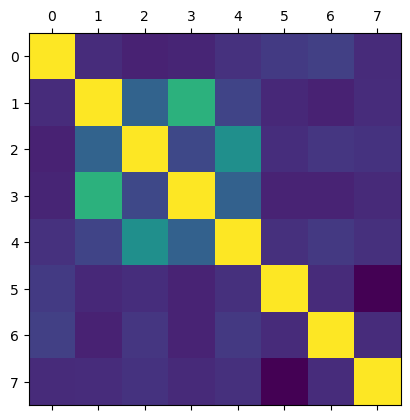

In [16]:
# create a correlation heatmap using matplotlib
plt.matshow(df_selected.corr())
plt.show()



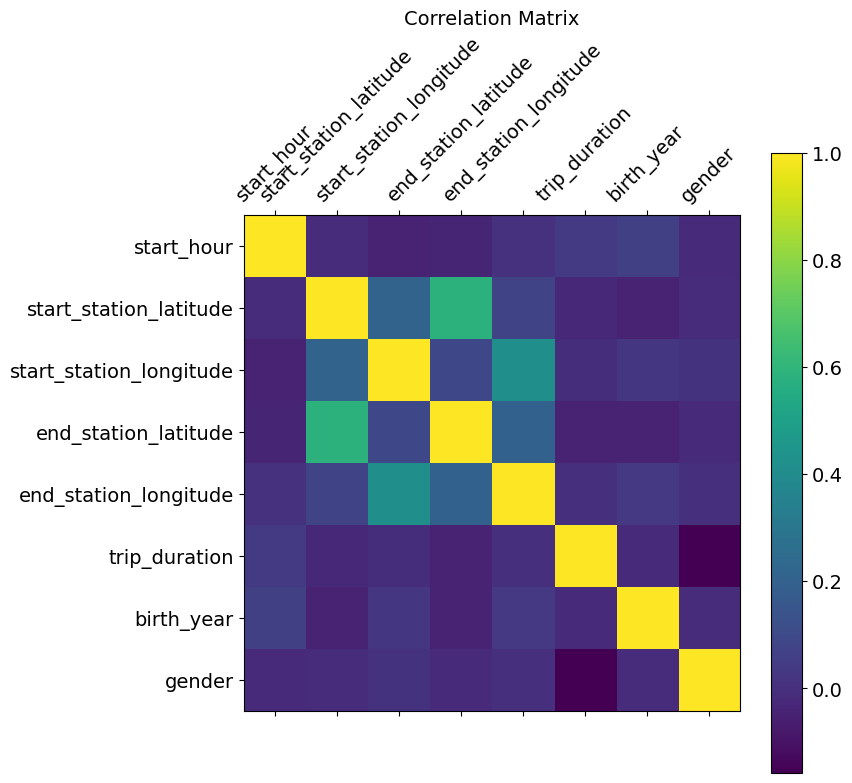

In [17]:
# add labels and legend
f= plt.figure(figsize=(8,8))
# figure size
plt.matshow(df_selected.corr(), fignum=f.number)
# type of plot
plt.xticks(range(df_selected.shape[1]),df_selected.columns, fontsize=14, rotation=45)
#x axis labels
plt.yticks(range(df_selected.shape[1]),df_selected.columns, fontsize=14)
# y axis labels
cb=plt.colorbar()
# add a color legend
cb.ax.tick_params(labelsize=14)
# add a font size
plt.title('Correlation Matrix',fontsize=14)
# add title
plt.show()

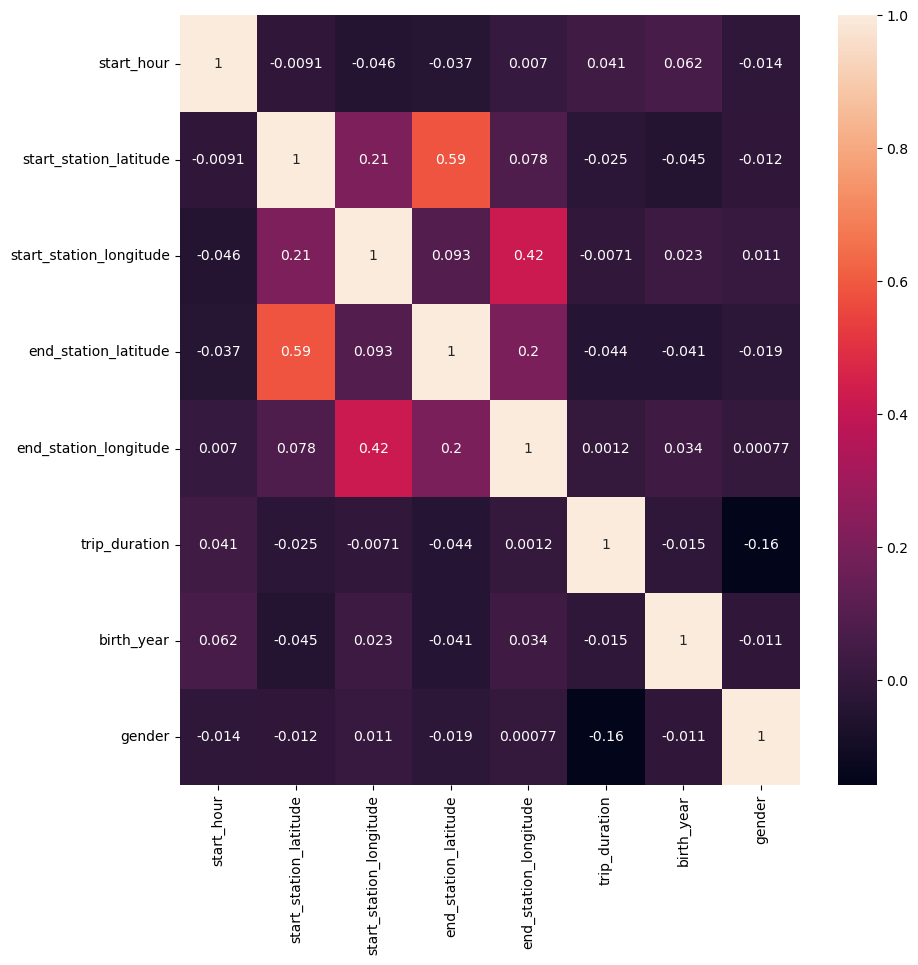

In [18]:
#Create a correlation heatmap using seaborn:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_selected.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
# Display the figure
plt.show()

### 3.2 Scatterplot

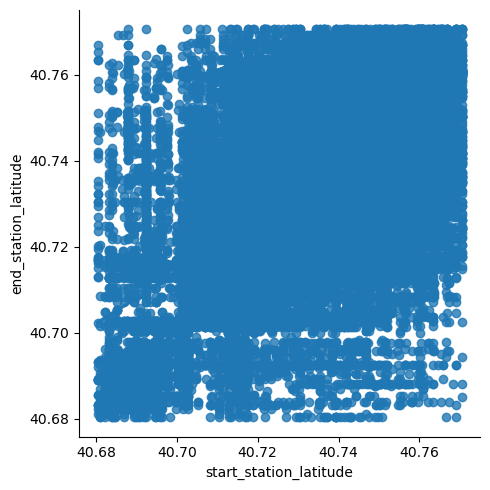

In [19]:
# Create a scatterplot for the "start_station_latitude" and "end_station_latitude" columns in seaborn
sns.lmplot(x = 'start_station_latitude', y = 'end_station_latitude', data = df_selected)
plt.show()


### 3.3 Pair Plots

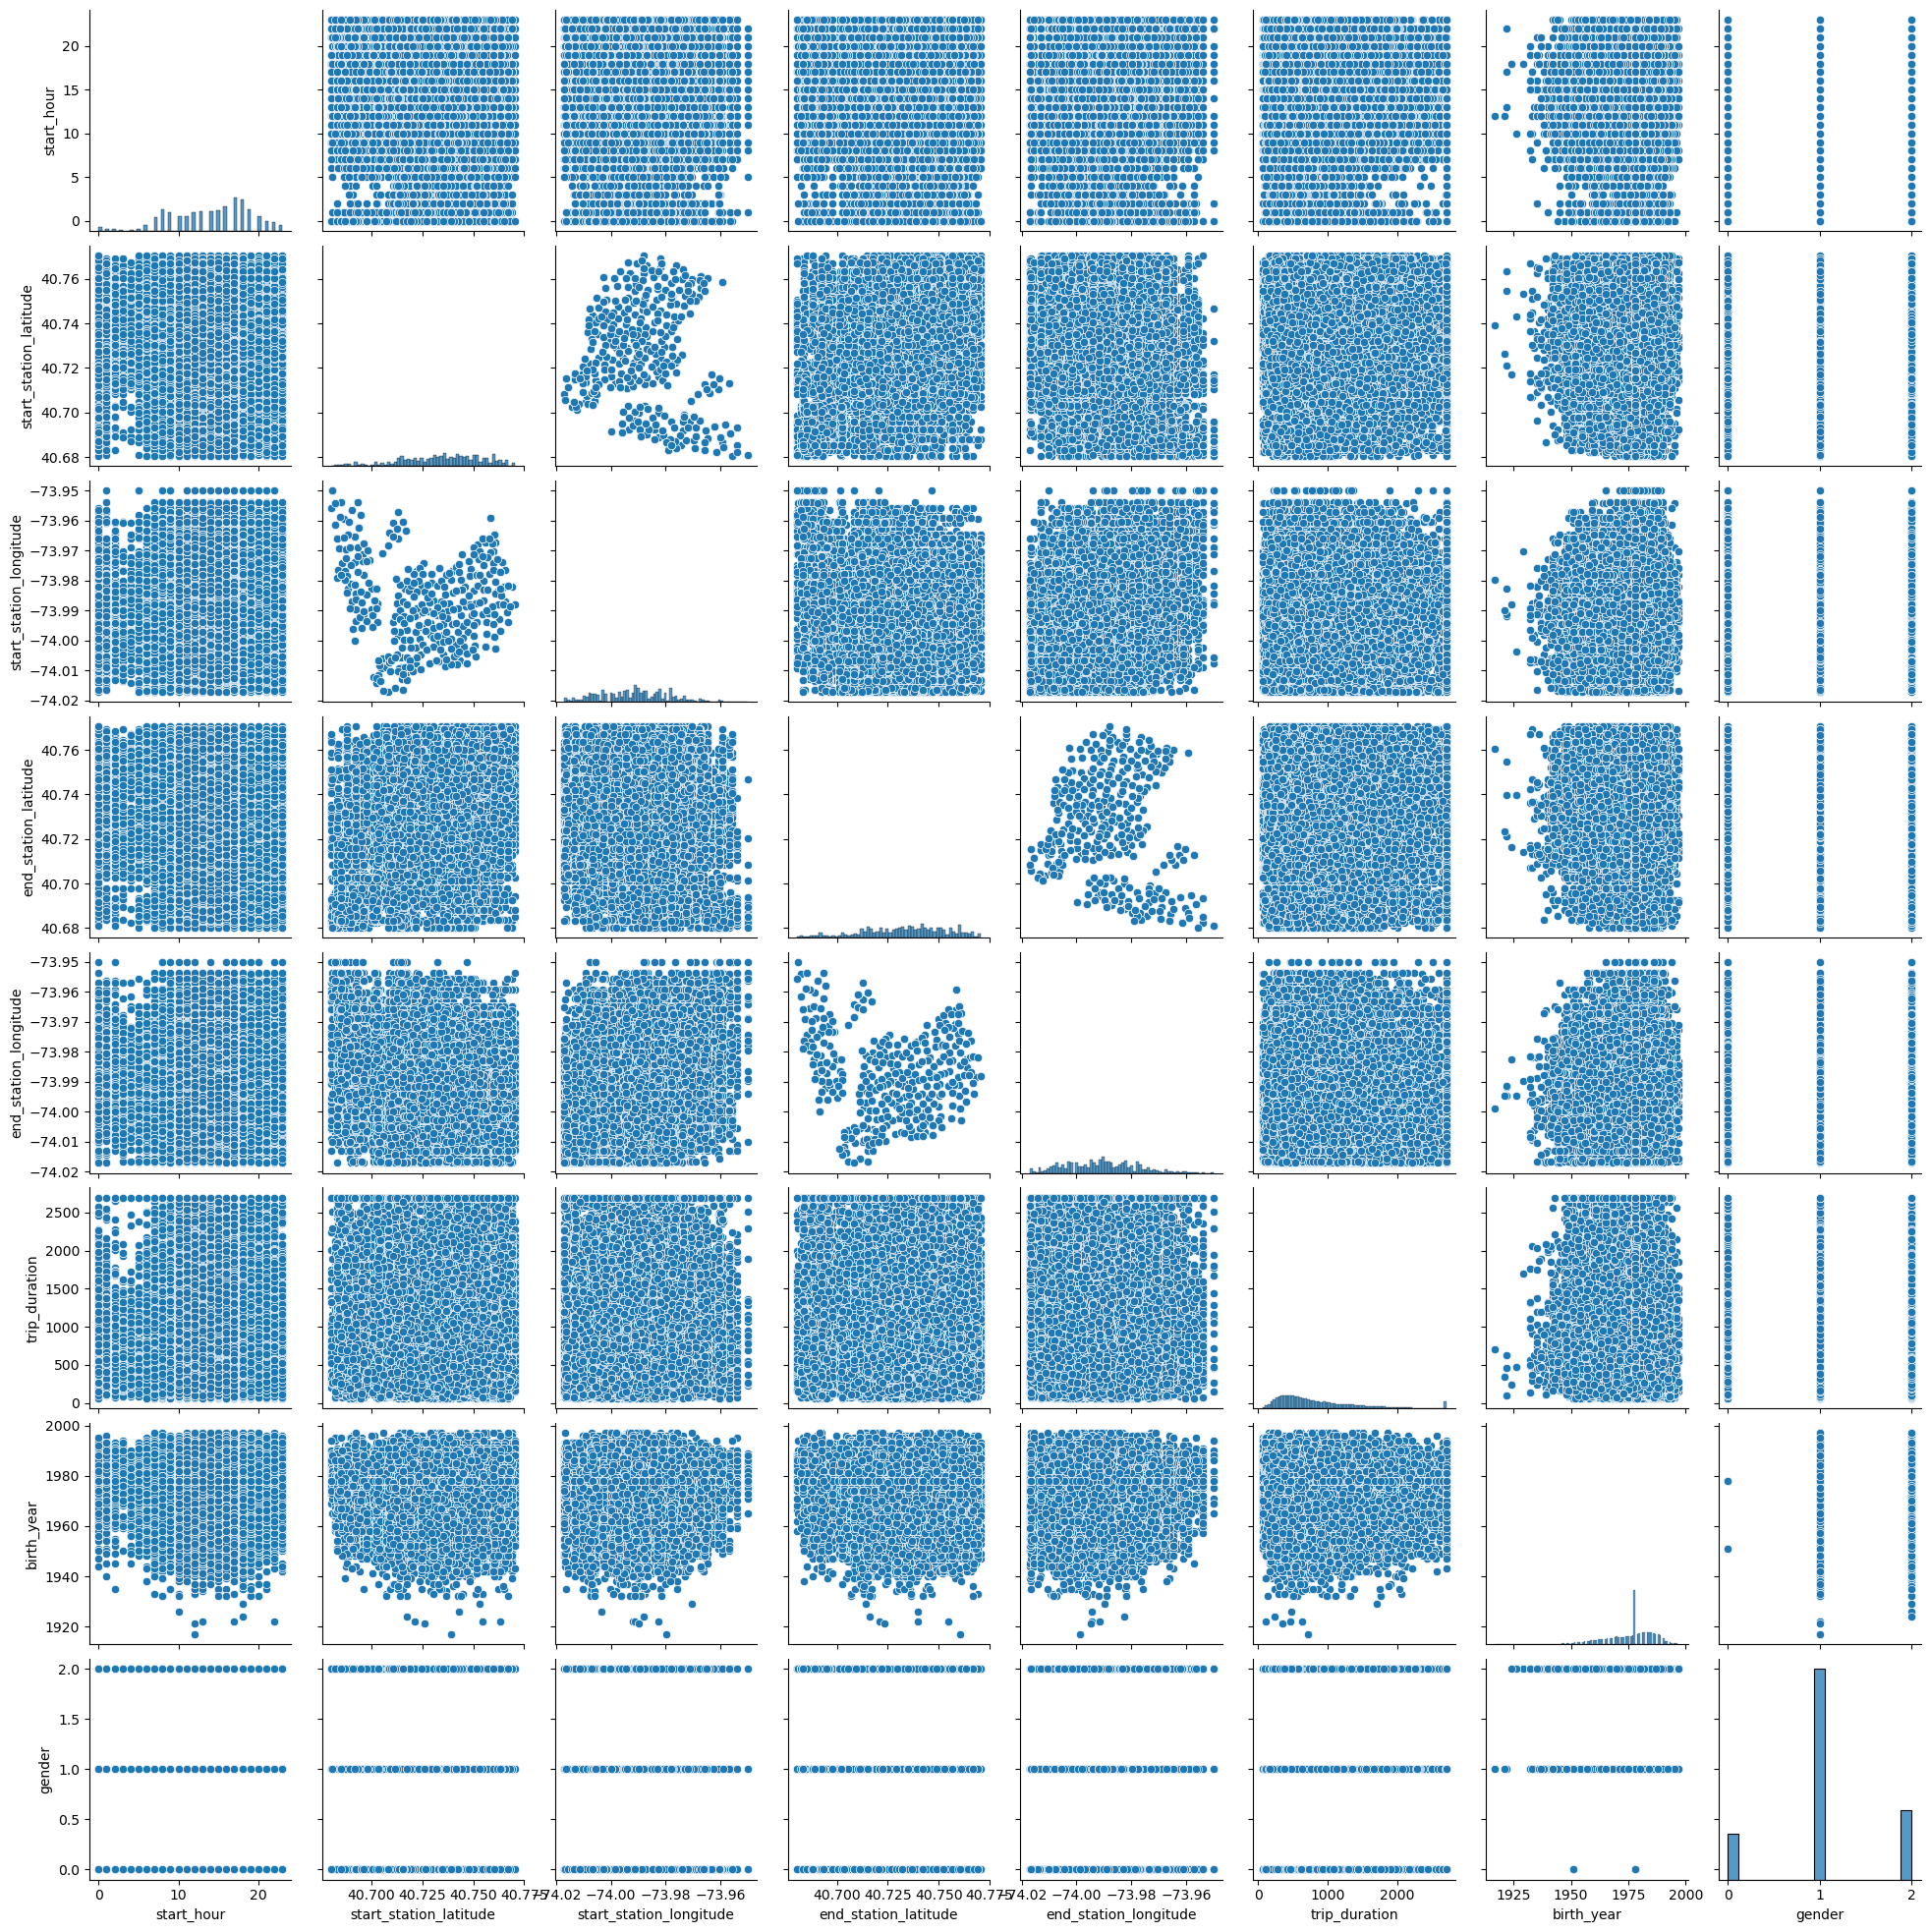

In [20]:
# Create a pair plot on the subset
pplot = sns.pairplot(df_selected)
plt.show()

### 3.4 Categorical Plots

In [21]:
df_clean.head()

trip_id  bike_id day_of_week  start_hour           start_time  \
0  LnQzQk    16013         Mon          18  2013-09-09 18:18:55   
1  IL9boN    15230         Thu          18  2013-09-12 18:38:53   
2  46clGB    17942         Wed          19  2013-09-18 19:44:04   
3  v7vdFt    19683         Sat          11  2013-09-28 11:54:37   
4  VGBsb5    18024         Sat          18  2013-09-07 18:08:22   

   start_station_id       start_station_name  start_station_latitude  \
0               523          W 38 St & 8 Ave               40.754666   
1               257  Lispenard St & Broadway               40.719392   
2               479          9 Ave & W 45 St               40.760193   
3               527          E 33 St & 1 Ave               40.743156   
4               521          8 Ave & W 31 St               40.750450   

   start_station_longitude             end_time  end_station_id  \
0               -73.991382  2013-09-09 18:35:28             334   
1               -74.002472  2013-09-12 18:48:34             236   
2               -73.991255  2013-09-18 19:50:05             513   
3               -73.974347  2013-09-28 12:03:58             441   
4               -73.994811  2013-09-07 18:46:38             476   

      end_station_name  end_station_latitude  end_station_longitude  \
0      W 20 St & 7 Ave             40.742388             -73.997262   
1  St Marks Pl & 2 Ave             40.728419             -73.987140   
2     W 56 St & 10 Ave             40.768254             -73.988639   
3      E 52 St & 2 Ave             40.756014             -73.967416   
4      E 31 St & 3 Ave             40.743943             -73.979661   

   trip_duration      subscriber  birth_year  gender  trip_duration_minutes  \
0            993      Subscriber        1968       2                     16   
1            581      Subscriber        1983       1                      9   
2            361      Subscriber        1989       1                      6   
3            561      Subscriber        1988       2                      9   
4           2296  Non-Subscriber        1978       0                     38   

   age  
0   45  
1   30  
2   24  
3   25  
4   35

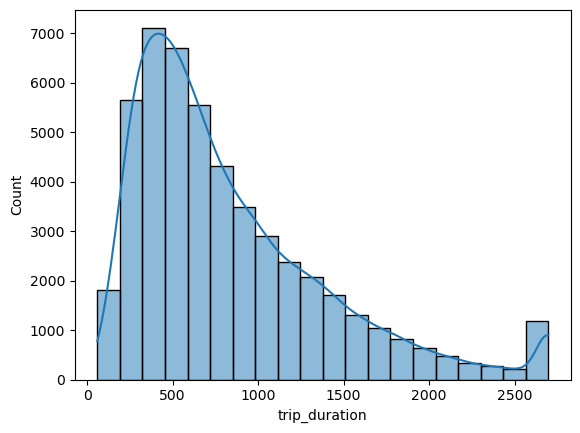

In [22]:
# create a histogram of trip duration
sns.histplot(df_clean['trip_duration'], bins = 20, kde = True)
plt.show()

In [23]:
df_clean.loc[df_clean['trip_duration'] < 300, 'Trip Range'] = 'short trip'


In [24]:
df_clean.loc[(df_clean['trip_duration'] >= 300) & (df_clean['trip_duration'] < 900), 'Trip Range'] = 'average trip'


In [25]:
df_clean.loc[df_clean['trip_duration'] >= 900, 'Trip Range'] = 'long trip'


In [26]:
df_clean['Trip Range'].value_counts(dropna = False)


Trip Range
average trip    26263
long trip       17512
short trip       6202
Name: count, dtype: int64

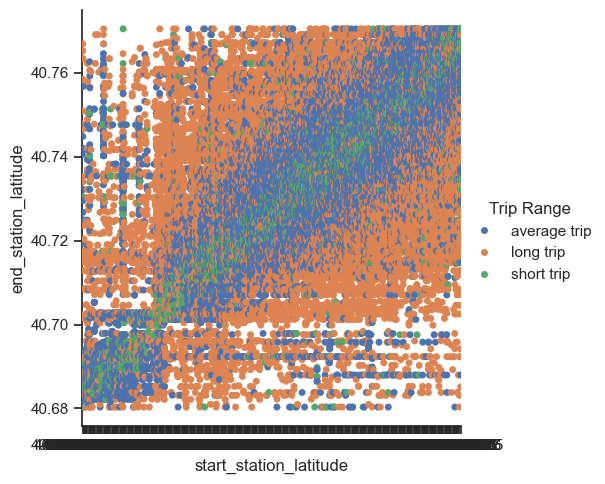

In [27]:
# Create a categorical plot in seaborn using the trip duration categories created above
sns.set(style="ticks")
catplot = sns.catplot(x="start_station_latitude", y="end_station_latitude", hue="Trip Range", data=df_clean)
plt.show()

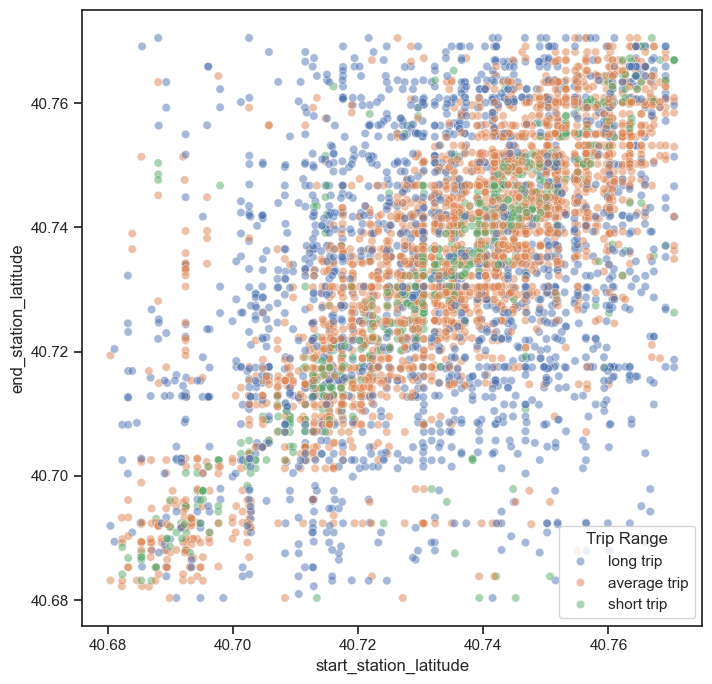

In [28]:
df_sampled = df_clean.sample(frac=0.1)
sns.set(style="ticks")
plt.figure(figsize=(8, 8))
catplot = sns.scatterplot(x="start_station_latitude", y="end_station_latitude", hue="Trip Range", data=df_sampled, alpha=0.5)
plt.show()

By observing the distribution of the colored points, one can discern trends, such as a concentration of blue points around the diagonal, suggesting that short trips often have similar departure and arrival latitudes, while longer trips may show more significant differences between these two geographical variables, thus allowing for a more detailed analysis of travel patterns based on distance.

<span style="color:red">This exercise of exploring relationships is very interesting for generating analytical hypotheses, but in the case of this dataset, the important and essential data to analyze and answer the questions posed in the previous exercise are not included in the partition used. Therefore, I will try to explore all the data in another way to answer these questions and create hypotheses

## 04. Answering analysis questions.

### 4.1 Analyze daily and weekly usage patterns to understand peak usage times

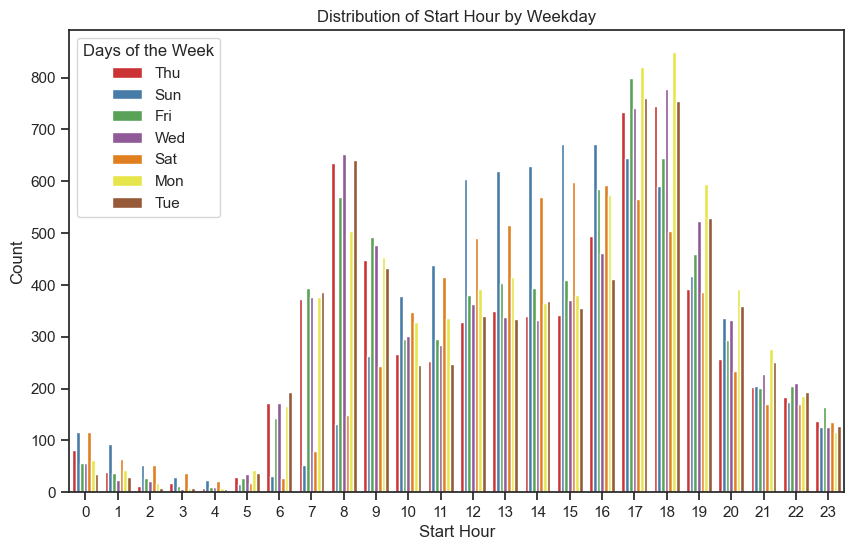

In [29]:
# Create a bar plot (count plot) of start_hour vs. day_of_week
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='start_hour', hue='day_of_week', palette='Set1')
plt.xlabel('Start Hour')
plt.ylabel('Count')
plt.title('Distribution of Start Hour by Weekday')
plt.legend(title='Days of the Week', loc='upper left')
# Save the figure to a file 
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'countplot_start_hour_by_weekday.png.png'))
# Display the plot
plt.show()


C:\Users\Bilel\AppData\Local\Temp\ipykernel_19324\3068140707.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='day_of_week', y='start_hour', palette='Set1')


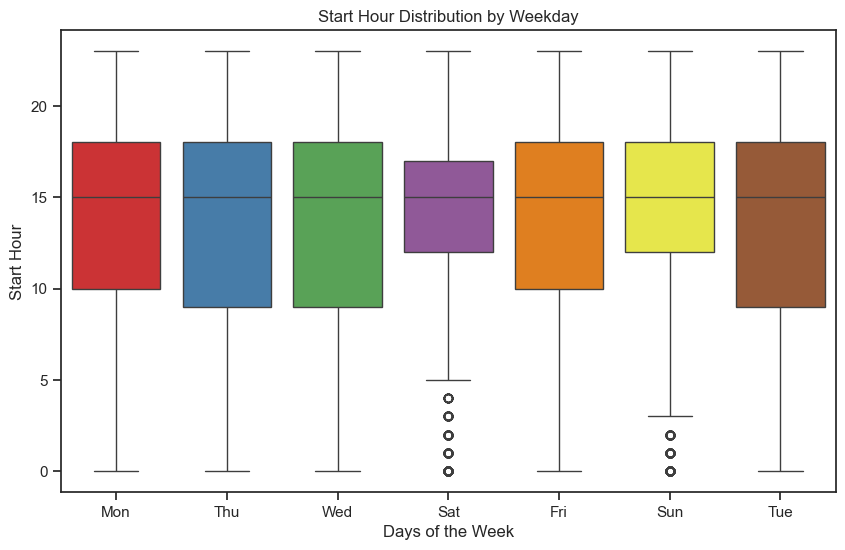

In [30]:
# Define the order of weekdays for proper visualization

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='day_of_week', y='start_hour', palette='Set1')
plt.xlabel('Days of the Week')
plt.ylabel('Start Hour')
plt.title('Start Hour Distribution by Weekday')

# Save the figure to a file 
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'boxplot_start_hour_by_weekday.png'))


# Display the plot
plt.show()


The bar plot above emphasizes the count or frequency of occurrences, while the box plot provides a summary of the distribution of start_hour within each weekday category which is essential for answering most of my questions. In the boxplot most riders do ride during the early hours until the mid-afternoon's as can be seen from the median displayed while busiest days fluctuates with week days being busier than weekend days.

### 4.2 What is the demographic profile (age and gender) of bike-sharing users?

In [31]:
# Define a mapping dictionary for gender values
gender_mapping = {'1': 'Male', '2': 'Female', '0': 'unknown'}
# Replace gender values with their corresponding names
df_clean['gender'] = df_clean['gender'].astype(str).replace(gender_mapping)

In [32]:
df_clean.head()

trip_id  bike_id day_of_week  start_hour           start_time  \
0  LnQzQk    16013         Mon          18  2013-09-09 18:18:55   
1  IL9boN    15230         Thu          18  2013-09-12 18:38:53   
2  46clGB    17942         Wed          19  2013-09-18 19:44:04   
3  v7vdFt    19683         Sat          11  2013-09-28 11:54:37   
4  VGBsb5    18024         Sat          18  2013-09-07 18:08:22   

   start_station_id       start_station_name  start_station_latitude  \
0               523          W 38 St & 8 Ave               40.754666   
1               257  Lispenard St & Broadway               40.719392   
2               479          9 Ave & W 45 St               40.760193   
3               527          E 33 St & 1 Ave               40.743156   
4               521          8 Ave & W 31 St               40.750450   

   start_station_longitude             end_time  ...     end_station_name  \
0               -73.991382  2013-09-09 18:35:28  ...      W 20 St & 7 Ave   
1               -74.002472  2013-09-12 18:48:34  ...  St Marks Pl & 2 Ave   
2               -73.991255  2013-09-18 19:50:05  ...     W 56 St & 10 Ave   
3               -73.974347  2013-09-28 12:03:58  ...      E 52 St & 2 Ave   
4               -73.994811  2013-09-07 18:46:38  ...      E 31 St & 3 Ave   

  end_station_latitude  end_station_longitude  trip_duration      subscriber  \
0            40.742388             -73.997262            993      Subscriber   
1            40.728419             -73.987140            581      Subscriber   
2            40.768254             -73.988639            361      Subscriber   
3            40.756014             -73.967416            561      Subscriber   
4            40.743943             -73.979661           2296  Non-Subscriber   

  birth_year   gender trip_duration_minutes  age    Trip Range  
0       1968   Female                    16   45     long trip  
1       1983     Male                     9   30  average trip  
2       1989     Male                     6   24  average trip  
3       1988   Female                     9   25  average trip  
4       1978  unknown                    38   35     long trip  

[5 rows x 21 columns]

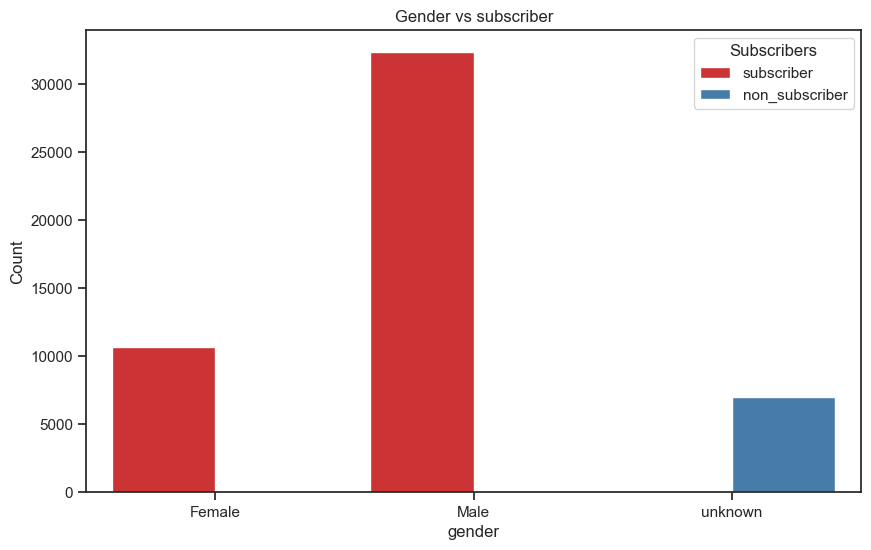

In [33]:
# Create a stacked bar plot
plt.figure(figsize=(10, 6))

sns.countplot(data=df_clean, x='gender', hue='subscriber', palette='Set1')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Gender vs subscriber')
plt.legend(title='Subscribers', loc='upper right', labels=['subscriber', 'non_subscriber'])
# Save the figure to a file 
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'Gender vs subscriber.png'))


plt.show()

In [34]:

# Calculate the counts for each gender and subscription status
counts = df_clean.groupby(['gender', 'subscriber']).size().unstack(fill_value=0)

# Calculate the difference between subscribers and non-subscribers
counts['difference'] = counts['Subscriber'] - counts['Non-Subscriber']

# Print the resulting DataFrame
print(counts)



subscriber  Non-Subscriber  Subscriber  difference
gender                                            
Female                   0       10658       10658
Male                     0       32338       32338
unknown               6979           2       -6977


42998 are subscribers with male gender dominating , 6979 Non-subscribers with unknown gender

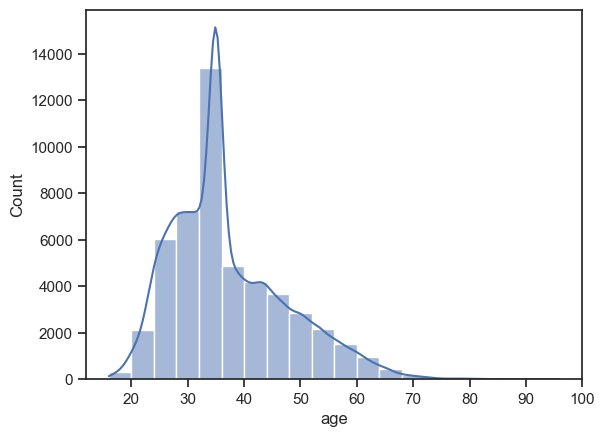

In [35]:
# create a histogram of age users
sns.histplot(df_clean['age'], bins = 20, kde = True)
plt.show()

In [36]:
df_clean.loc[df_clean['age'] < 18, 'age_category'] = 'Under 18'

In [37]:
df_clean.loc[(df_clean['age'] >= 18) & (df_clean['age'] < 30), 'age_category'] = 'Young Adult'


In [38]:
df_clean.loc[(df_clean['age'] >= 30) & (df_clean['age'] < 40), 'age_category'] = 'Adult'


In [39]:
df_clean.loc[(df_clean['age'] >= 40) & (df_clean['age'] < 50), 'age_category'] = 'Middle Age'


In [40]:
df_clean.loc[(df_clean['age'] >= 50) & (df_clean['age'] < 60), 'age_category'] = 'Senior '


In [41]:
df_clean.loc[df_clean['age'] >= 60, 'age_category'] = 'Elderly'

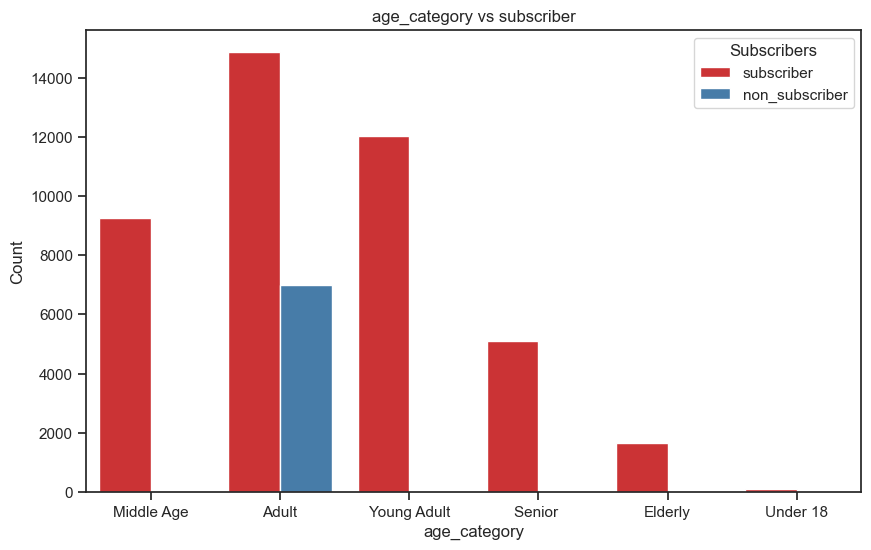

In [42]:
# Create a stacked bar plot
plt.figure(figsize=(10, 6))

sns.countplot(data=df_clean, x='age_category', hue='subscriber', palette='Set1')
plt.xlabel('age_category')
plt.ylabel('Count')
plt.title('age_category vs subscriber')
plt.legend(title='Subscribers', loc='upper right', labels=['subscriber', 'non_subscriber'])
# Save the figure to a file 
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'age_category vs subscriber.png'))


plt.show()

In [43]:
# Calculate the counts for each gender and subscription status
counts = df_clean.groupby(['age_category', 'subscriber']).size().unstack(fill_value=0)

# Calculate the difference between subscribers and non-subscribers
counts['difference'] = counts['Subscriber'] - counts['Non-Subscriber']

# Print the resulting DataFrame
print(counts)

subscriber    Non-Subscriber  Subscriber  difference
age_category                                        
Adult                   6979       14867        7888
Elderly                    0        1654        1654
Middle Age                 0        9256        9256
Senior                     0        5099        5099
Under 18                   0          93          93
Young Adult                0       12029       12029


The analysis of the subscriber data reveals several key insights. The "Adult" category has the highest number of subscribers, totaling 14,867, with a difference of 7,888 when compared to non-subscribers. This suggests that the adult age group is significantly more engaged with the service. The "Young Adult" category follows with 12,029 subscribers and no non-subscribers, indicating a strong preference or higher adoption rate among this age group.

The "Middle Age" category also shows a substantial number of subscribers, totaling 9,256, again with no non-subscribers. This pattern is similarly observed in the "Senior" and "Elderly" categories, with 5,099 and 1,654 subscribers respectively, and no non-subscribers.

Interestingly, the "Under 18" category has the least number of subscribers, only 93, which might align with the nature of the service being more relevant or accessible to older age groups.

### 4.3 Identify the most frequently used bike routes and popular starting and ending stations

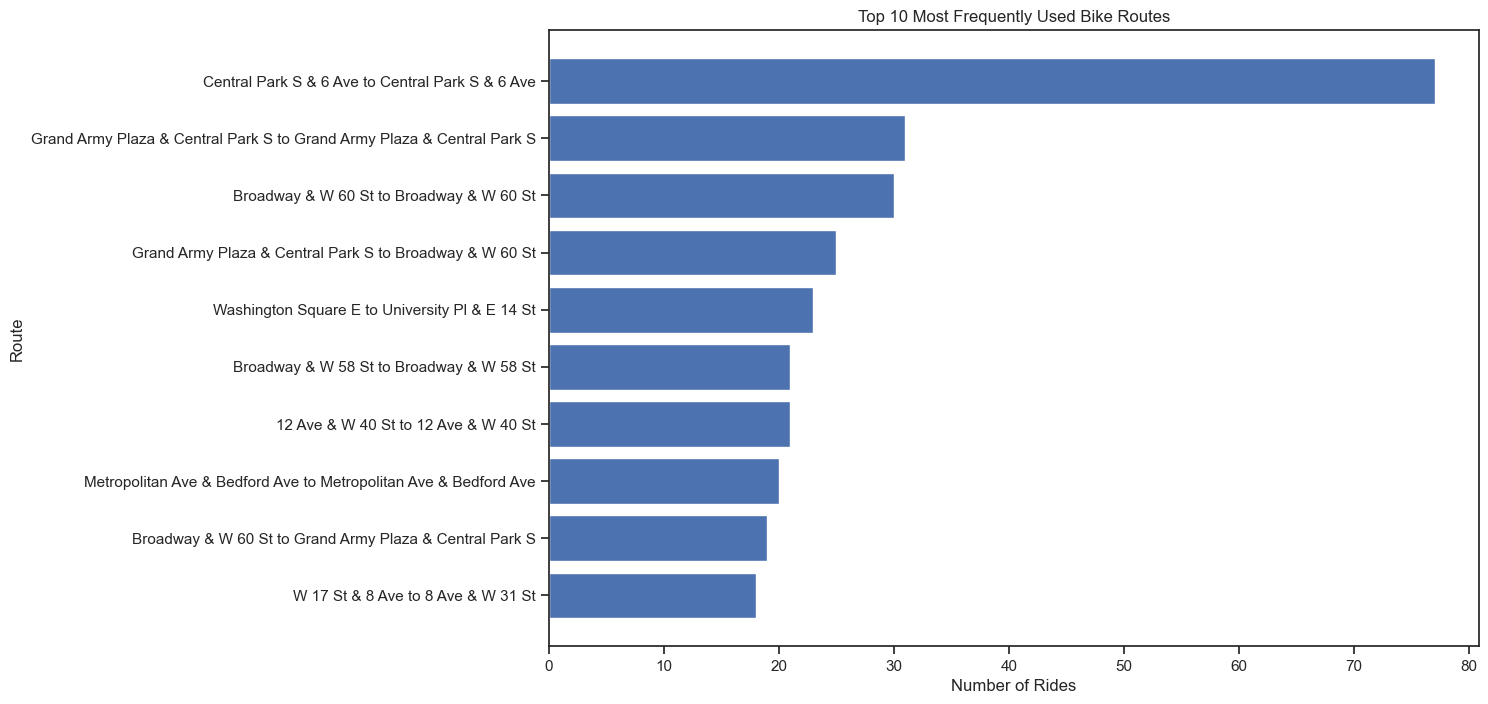

In [44]:
# Group by the combination of starting and ending stations and count the number of rides
route_counts =  df_clean.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='ride_count')

# Sort the routes by ride count in descending order to find the most popular ones
top_routes = route_counts.sort_values(by='ride_count', ascending=False).head(10)

# Create a bar plot to visualize the top routes
plt.figure(figsize=(12, 8))
plt.barh(top_routes['start_station_name'] + ' to ' + top_routes['end_station_name'], top_routes['ride_count'], color='b')
plt.xlabel('Number of Rides')
plt.ylabel('Route')
plt.title('Top 10 Most Frequently Used Bike Routes')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most popular route at the top
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'Top 10 Most Frequently Used Bike Routes.png'))

plt.show()

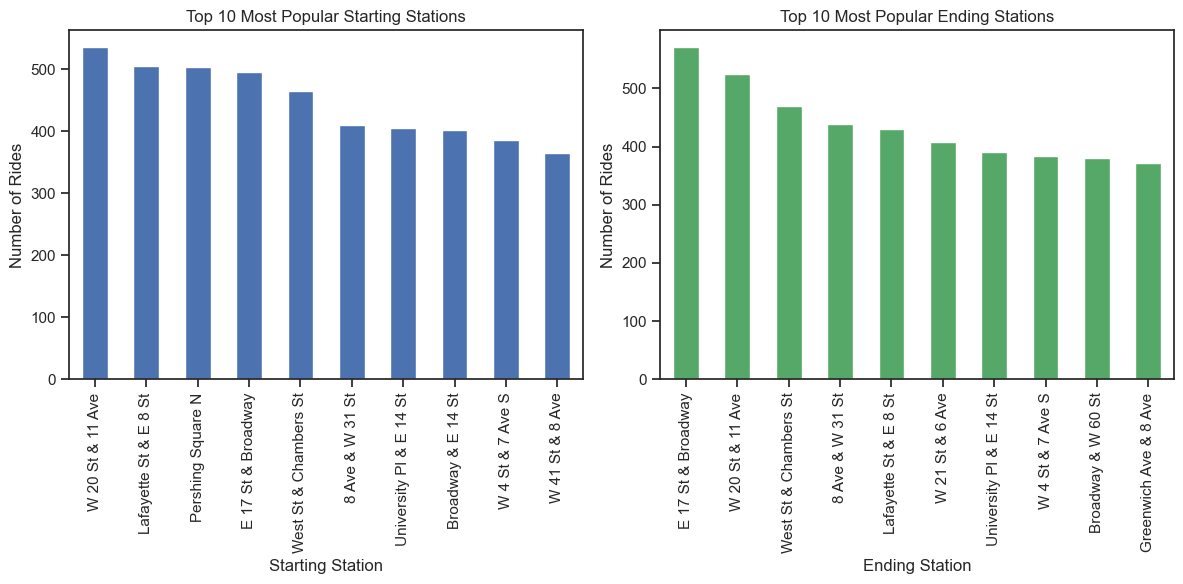

In [45]:
start_station_counts = df_clean['start_station_name'].value_counts().head(10)
end_station_counts = df_clean['end_station_name'].value_counts().head(10)

# Create bar plots for popular starting and ending stations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
start_station_counts.plot(kind='bar', color='b')
plt.xlabel('Starting Station')
plt.ylabel('Number of Rides')
plt.title('Top 10 Most Popular Starting Stations')


plt.subplot(1, 2, 2)
end_station_counts.plot(kind='bar', color='g')
plt.xlabel('Ending Station')
plt.ylabel('Number of Rides')
plt.title('Top 10 Most Popular Ending Stations')
plt.savefig(os.path.join(path, '04 Analysis', 'visualizations', 'Top 10 Most Popular Stations.png'))

plt.tight_layout()
plt.show()

## 05. Hypothesis

1. The majority of riders are subscribers, as they may use the service more frequently and have a subscription.
2. Peak usage times occur during weekday rush hours, with additional peaks on weekends for leisure riders.
3. Certain routes and station pairs will have significantly higher usage, indicating their popularity.

In [46]:
df_clean.to_csv(os.path.join(path,'02 Data','Prepared Data', 'citi_derived.csv'))
